In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/omicron-rising/omicron.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# **Loading Dataset**

In [3]:
df=pd.read_csv('/kaggle/input/omicron-rising/omicron.csv')

# **Examining Dataset**

In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

id             user_name   user_location  \
0  1465693385088323591                Abaris           Hants   
1  1465693062999412746                GFTs         Lalaland   
2  1465690116442279942  Herbie Finkle (Cozy)             NaN   
3  1465689607165591552     Electrical Review  United Kingdom   
4  1465688203709464578       BingX Academy 🔑             NaN   

                                    user_description         user_created  \
0  Would appear on Blogger (did originally),  but...  2009-09-16 14:30:32   
1  There's a field somewhere beyond all doubt and...  2019-12-28 14:29:13   
2                           help me find me frens ❤️  2021-07-10 09:40:57   
3  Electrical Review is a monthly journal aimed a...  2009-05-21 08:32:19   
4  BingX (Prev. Bingbon) is the world's top crypt...  2013-12-31 02:57:32   

   user_followers  user_friends  user_favourites  user_verified  \
0            2880          4369            26907          False   
1             165           583            21152          False   
2             114           393             2339          False   
3           20759          2321              739          False   
4           17134             8               31          False   

                  date                                               text  \
0  2021-11-30 14:45:08  @SkyNews "Told you I'd be Back!" #OMICRON “Odi...   
1  2021-11-30 14:43:52  Someone told me this in October #Omicron https...   
2  2021-11-30 14:32:09  Glad to see the public schoolkids are wrapping...   
3  2021-11-30 14:30:08  #Automation systems have become increasingly c...   
4  2021-11-30 14:24:33  🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...   

         hashtags               source  retweets  favorites  is_retweet  
0     ['OMICRON']      Twitter Web App         0          0       False  
1     ['Omicron']  Twitter for Android         0          0       False  
2       ['COVID']      Twitter Web App         0          1       False  
3  ['Automation']       Hootsuite Inc.         0          0       False  
4             NaN      Twitter Web App         2          2       False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78168 entries, 0 to 78167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                78168 non-null  int64 
 1   user_name         78168 non-null  object
 2   user_location     61122 non-null  object
 3   user_description  73693 non-null  object
 4   user_created      78168 non-null  object
 5   user_followers    78168 non-null  int64 
 6   user_friends      78168 non-null  int64 
 7   user_favourites   78168 non-null  int64 
 8   user_verified     78168 non-null  bool  
 9   date              78168 non-null  object
 10  text              78168 non-null  object
 11  hashtags          54673 non-null  object
 12  source            78168 non-null  object
 13  retweets          78168 non-null  int64 
 14  favorites         78168 non-null  int64 
 15  is_retweet        78168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 8.5+ MB


In [7]:
df.describe()

id  user_followers   user_friends  user_favourites  \
count  7.816800e+04    7.816800e+04   78168.000000     7.816800e+04   
mean   1.474922e+18    1.621342e+05    1826.918215     1.828934e+04   
std    7.954872e+15    1.124701e+06    9064.529514     5.386442e+04   
min    1.465648e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.468108e+18    1.000000e+02      88.000000     3.700000e+02   
50%    1.471580e+18    7.800000e+02     438.000000     2.069000e+03   
75%    1.481682e+18    4.521000e+03    1553.000000     1.320775e+04   
max    1.490261e+18    1.668546e+07  386228.000000     1.471907e+06   

           retweets     favorites  
count  78168.000000  78168.000000  
mean       1.869090      6.317867  
std       21.294972     92.581616  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      2.000000  
max     3808.000000  21790.000000

In [8]:
#total null values
df.isnull().sum().sum()

45016

In [9]:
pd.isnull(df).sum()

id                      0
user_name               0
user_location       17046
user_description     4475
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            23495
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

**So from a preliminary analysis of our data we can see that the train set contains 78168 rows and 16 columns. Our data contains about 3.6% of missing values with them being in 'user_location', 'user_description' and 'hashtags' columns. There are 6 numerical, 8 categorical and 2 boolean columns.**

# **Exploratory Data Analysis**

# Missing Values

<Figure size 1296x1152 with 0 Axes>

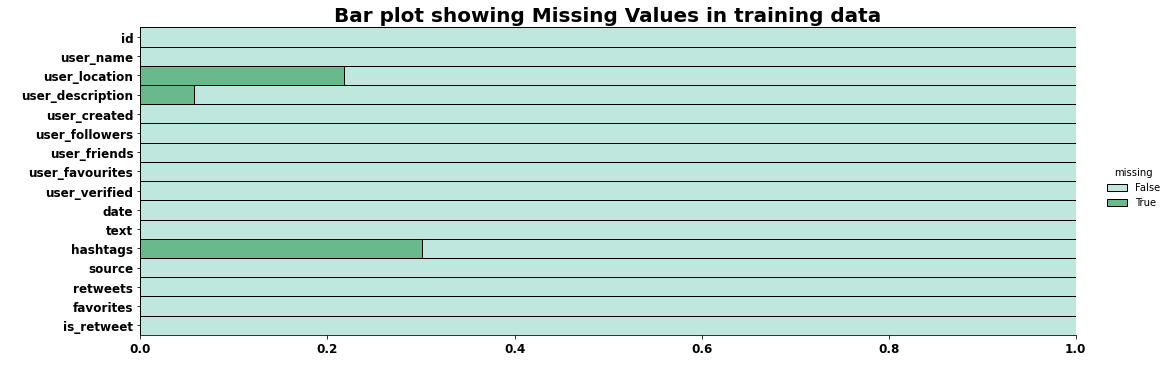

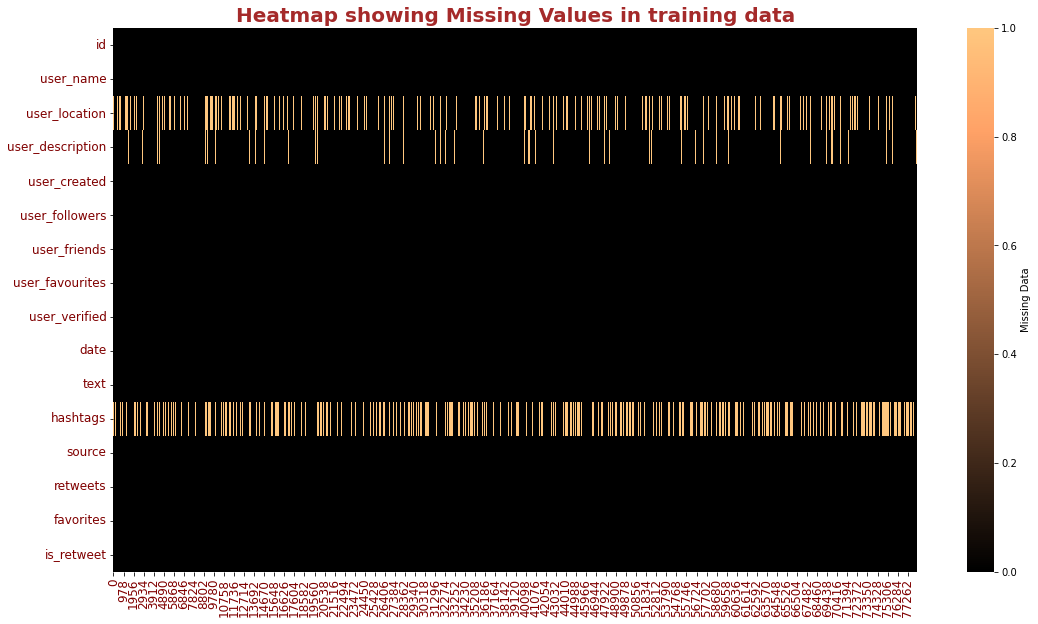

In [10]:
plt.figure(figsize=(18,16))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='BuGn'
)
plt.title('Bar plot showing Missing Values in training data', weight = 'bold', size = 20, color = 'black')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'black')
plt.yticks(size = 12, weight = 'bold', color = 'black');

plt.figure(figsize=(18,10))
sns.heatmap(df.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in training data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

# Correlation matrix

<AxesSubplot:>

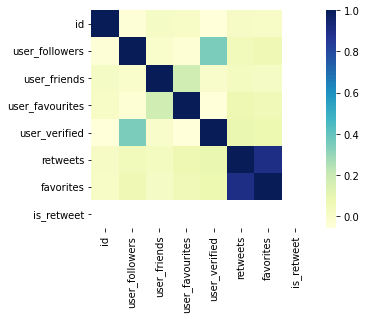

In [11]:
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")

**From this we can see that favourites and retweets are highly correlated which makes sense. Also user_verified and user_followers have a high correlation.**

# Some Other Plots

In [12]:
import warnings
warnings.filterwarnings('ignore')

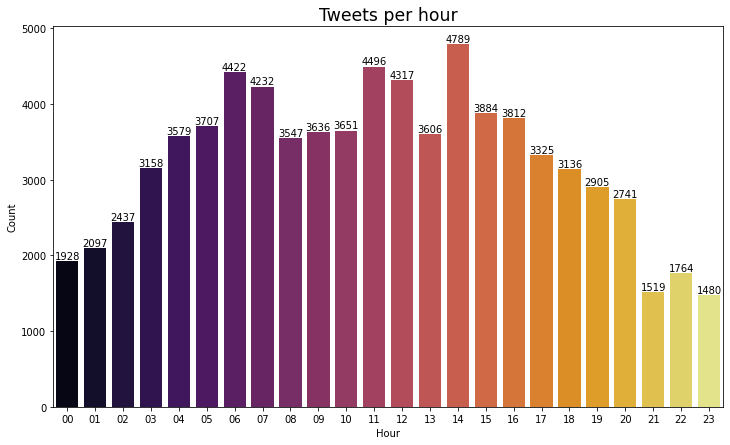

In [13]:
# change to date time format
df['date']=pd.to_datetime(df['date'])

# tweets per hour
tweets_per_hr = df['date'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Tweets per hour', size='xx-large')
plt.show()

In [14]:
# excluding null values (where location is not specified) in user_location 
location = [loc for loc in df['user_location'] if type(loc)==str]

# extracting country names from given location
country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:5]

['United Kingdom', 'Canada', 'Sri Lanka', 'India', 'Spain']

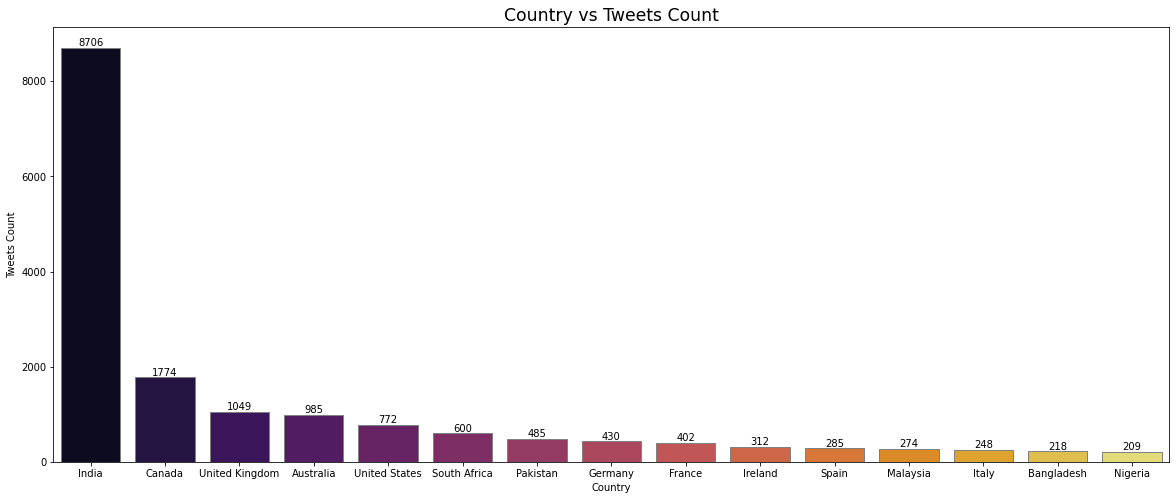

In [15]:
# dictionary to count number of occurances of each country
count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1

# Country vs tweets count
country_df = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
country_df = country_df.sort_values(by = 'Tweets Count', ascending=False)
country_df=country_df[:15] # top 15 countries

# plot the data
plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='inferno', edgecolor='grey');
ax.bar_label(ax.containers[0])
plt.show()

# **Preprocessing**

In [16]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # lemmatization
    tweet = [WordNetLemmatizer().lemmatize(word) for word in tweet.split(' ')]
    tweet = " ".join(tweet)
    # stopword removal
    tweet = [word for word in tweet.split(' ') if word not in set(stopwords.words('english'))]
    tweet=" ".join(tweet)
    
    return tweet

In [17]:
df['text']=df['text'].apply(preprocess_tweet_text)

In [18]:
word_count = [len(text.split()) for text in df.text]
df['word_count'] = word_count

# excluding text with less than 3 words
df=df[df['word_count']>2]

# excluding tweets with more than 16 words
df=df[df['word_count']<17]

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in df["text"]]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in df["text"]]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in df["text"]]

df1 = df[["text", "Positive","Neutral", "Negative"]]
df1.head()

text  Positive  Neutral  \
0   Told Id Back OMICRON “Odium Medicum Insensate...     0.000    0.800   
1                      Someone told October Omicron      0.000    1.000   
2  Glad see public schoolkids wrapping 2021 sign ...     0.197    0.592   
3  Automation system become increasingly complex ...     0.000    1.000   
5  Digitaldisruption emerging technology stay pri...     0.000    1.000   

   Negative  
0     0.200  
1     0.000  
2     0.211  
3     0.000  
5     0.000

In [20]:
sentiments_nltk = []

for tweet in df.text:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
df['sentiment_nltk'] = sentiments_nltk
df['sentiment_nltk'].value_counts()

neu    69258
pos     1482
neg     1161
Name: sentiment_nltk, dtype: int64